<a href="https://colab.research.google.com/github/mprksa/DTx/blob/main/DTxx4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
import pandas as pd
import random

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!git clone https://github.com/mprksa/DT.git

Cloning into 'DT'...
remote: Enumerating objects: 340, done.
remote: Counting objects: 100% (340/340), done.
remote: Compressing objects: 100% (337/337), done.
remote: Total 340 (delta 28), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (340/340), 342.22 MiB | 25.61 MiB/s, done.
Resolving deltas: 100% (28/28), done.
Updating files: 100% (280/280), done.


In [33]:
# Path ke direktori gambar
image_dir = '/content/drive/MyDrive/DTx2-main'

In [34]:
# Warna kubus dan labelnya
colors = ['Biru', 'Hijau', 'Kuning', 'Merah', 'Ungu']
labels = {'Biru': 0, 'Hijau': 1, 'Kuning': 2, 'Merah': 3,  'Ungu': 4}

In [35]:
# Menginisialisasi array untuk menyimpan nilai HSV, label, dan path gambar
hsv_values = []
color_labels = []
image_paths = []

# Loop melalui setiap warna dan proses gambarnya
for color in colors:
    color_dir = os.path.join(image_dir, color)
    for img_name in os.listdir(color_dir):
        img_path = os.path.join(color_dir, img_name)
        image = cv2.imread(img_path)

        # Check if the image was loaded successfully
        if image is None:
            print(f"Failed to load image: {img_path}")
            continue  # Skip to the next image

        hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

        # Menghitung rata-rata HSV
        avg_hsv = np.mean(hsv_image.reshape(-1, 3), axis=0)

        hsv_values.append(avg_hsv)
        color_labels.append(labels[color])
        image_paths.append(img_path)

hsv_values = np.array(hsv_values)
color_labels = np.array(color_labels)

Failed to load image: /content/drive/MyDrive/DTx2-main/Biru/test
Failed to load image: /content/drive/MyDrive/DTx2-main/Hijau/test
Failed to load image: /content/drive/MyDrive/DTx2-main/Kuning/test
Failed to load image: /content/drive/MyDrive/DTx2-main/Merah/test
Failed to load image: /content/drive/MyDrive/DTx2-main/Ungu/test


In [36]:
# Menghitung jumlah gambar yang dilatih per kelas
num_images_per_class = {color: sum(1 for img_name in os.listdir(os.path.join(image_dir, color))) for color in colors}
print("Jumlah gambar yang dilatih per kelas:")
print(num_images_per_class)

Jumlah gambar yang dilatih per kelas:
{'Biru': 137, 'Hijau': 143, 'Kuning': 138, 'Merah': 169, 'Ungu': 157}


In [37]:
# Menghitung nilai minimum, maksimum, dan rata-rata H, S, dan V pada tiap kelas
hsv_df = pd.DataFrame(hsv_values, columns=['H', 'S', 'V'])
hsv_df['label'] = color_labels

for label, color in labels.items():
    class_stats = hsv_df[hsv_df['label'] == color].describe().loc[['min', 'max', 'mean']]
    print(f"Statistik HSV untuk kelas {label}:")
    print(class_stats)

Statistik HSV untuk kelas Biru:
               H           S           V  label
min    33.672682   53.483966   83.155714    0.0
max   104.870463  219.723198  238.569194    0.0
mean   84.094805  112.175257  173.798479    0.0
Statistik HSV untuk kelas Hijau:
              H           S           V  label
min   20.795019   38.687587   86.209898    1.0
max   96.435942  181.236951  222.063025    1.0
mean  64.269638   86.724593  167.567020    1.0
Statistik HSV untuk kelas Kuning:
              H           S           V  label
min   15.259415   45.934743   97.338174    2.0
max   78.371499  240.684835  235.650069    2.0
mean  42.207611  108.335722  182.034229    2.0
Statistik HSV untuk kelas Merah:
               H           S           V  label
min     1.293470   62.906888   91.763768    3.0
max   176.704975  233.287396  240.474074    3.0
mean   53.361500  131.419730  171.322769    3.0
Statistik HSV untuk kelas Ungu:
               H           S           V  label
min    51.457934   45.717894

In [38]:
# Membagi data menjadi data latih, validasi, dan data uji
X_temp, X_test, y_temp, y_test, paths_temp, paths_test = train_test_split(hsv_values, color_labels, image_paths, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val, paths_train, paths_val = train_test_split(X_temp, y_temp, paths_temp, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

In [43]:
# Menghitung jumlah gambar di data validasi per kelas
val_class_counts = {color: np.sum(y_val == label) for color, label in labels.items()}
print("Jumlah gambar di data Validasi per kelas:")
print(val_class_counts)

Jumlah gambar di data Validasi per kelas:
{'Biru': 33, 'Hijau': 28, 'Kuning': 28, 'Merah': 28, 'Ungu': 31}


In [42]:
# Menghitung jumlah gambar di data uji per kelas
test_class_counts = {color: np.sum(y_test == label) for color, label in labels.items()}
print("Jumlah gambar di data Testing per kelas:")
print(test_class_counts)

Jumlah gambar di data Testing per kelas:
{'Biru': 33, 'Hijau': 26, 'Kuning': 33, 'Merah': 31, 'Ungu': 25}


In [44]:
# Melatih model decision tree
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [45]:
# Evaluasi pada data validasi
y_val_pred = model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
# Evaluasi pada data uji
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [46]:
print(f'Akurasi validasi: {val_accuracy * 100:.2f}%')
print(f'Akurasi testing: {test_accuracy * 100:.2f}%')

Akurasi validasi: 99.32%
Akurasi testing: 97.97%


In [47]:
# Menampilkan Classification Report
print("Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=colors))

Classification Report:
              precision    recall  f1-score   support

        Biru       1.00      1.00      1.00        33
       Hijau       1.00      1.00      1.00        26
      Kuning       0.94      0.97      0.96        33
       Merah       0.97      0.94      0.95        31
        Ungu       1.00      1.00      1.00        25

    accuracy                           0.98       148
   macro avg       0.98      0.98      0.98       148
weighted avg       0.98      0.98      0.98       148



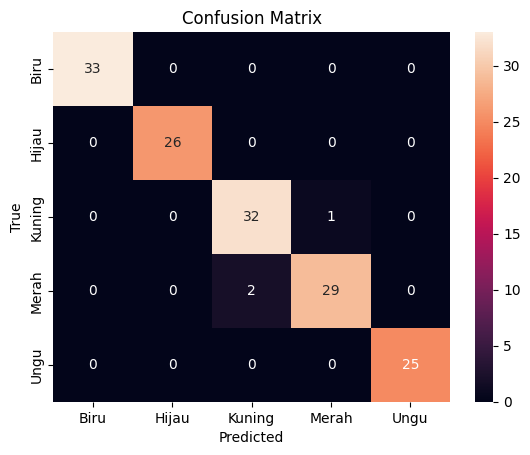

In [48]:
# Menampilkan Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=colors, yticklabels=colors)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

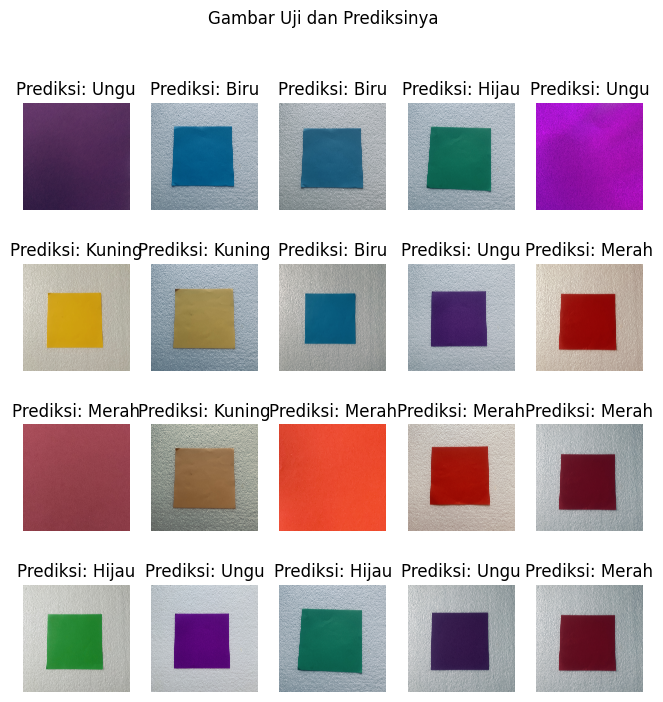

In [54]:
# Menampilkan gambar uji beserta prediksinya
plt.figure(figsize=(8, 8))
for i in range(20):  # Menampilkan 9 gambar acak dari data uji
    index = random.randint(0, len(paths_test) - 1)
    img = cv2.imread(paths_test[index])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    true_label = colors[y_test[index]]
    pred_label = colors[y_test_pred[index]]

    plt.subplot(4, 5, i + 1)
    plt.imshow(img)
    plt.title(f"Prediksi: {true_label}")
    plt.axis('off')
plt.suptitle("Gambar Uji dan Prediksinya")
plt.show()

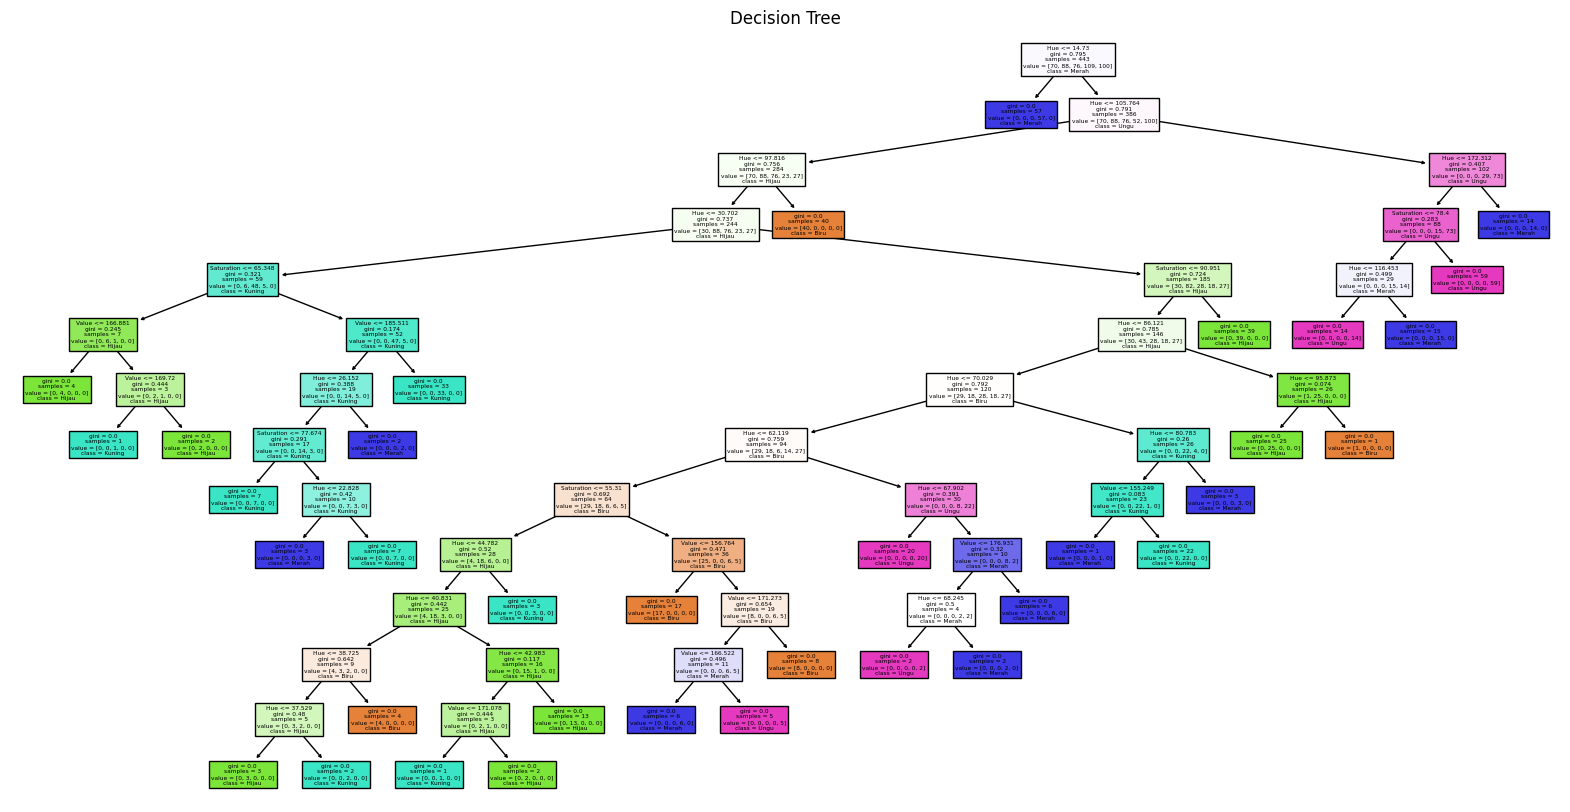

In [55]:
# Menampilkan Decision Tree
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=['Hue', 'Saturation', 'Value'], class_names=colors, filled=True)
plt.title('Decision Tree')
plt.show()

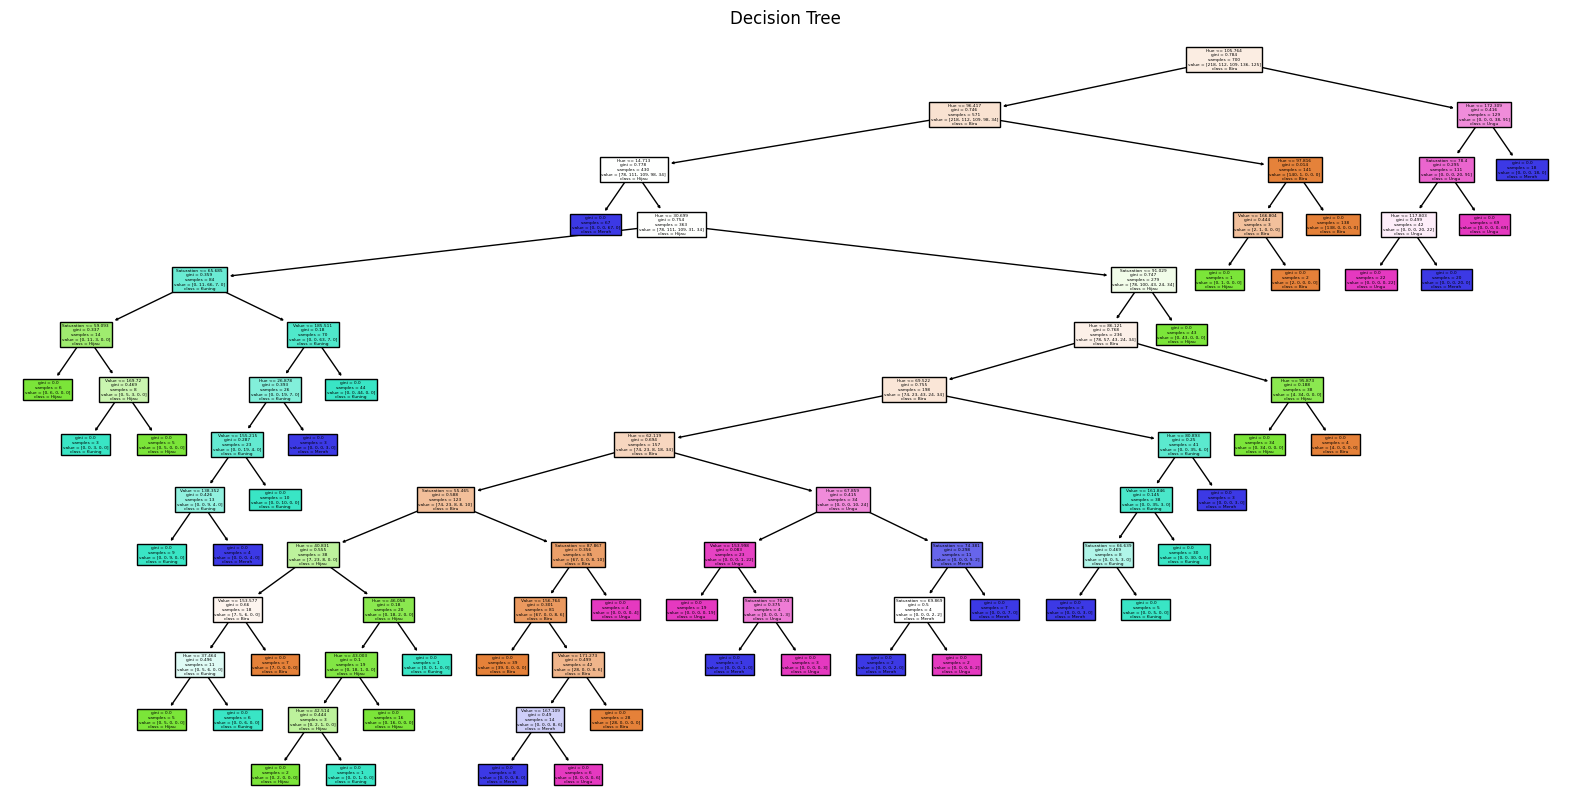

In [16]:
import pickle

# Simpan model ke dalam file pickle
with open('DTxt.pkl', 'wb') as f:
    pickle.dump(model, f)

# **With Augmentation, Min, and Max HSV Value**

In [16]:
# Augmentasi data menggunakan ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [17]:
# Fungsi untuk memuat gambar dan mengubahnya ke HSV
def load_and_preprocess_image(img_path):
    image = cv2.imread(img_path)
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    return hsv_image

In [ ]:
# Loop untuk augmentasi data dan menghitung nilai HSV
augmented_hsv_values = []
augmented_labels = []

for color in colors:
    color_dir = os.path.join(image_dir, color)
    for img_name in os.listdir(color_dir):
        img_path = os.path.join(color_dir, img_name)
        image = cv2.imread(img_path)
        image = np.expand_dims(image, 0)

        i = 0
        for batch in datagen.flow(image, batch_size=1):
            hsv_image = cv2.cvtColor(batch[0], cv2.COLOR_BGR2HSV)
            avg_hsv = np.mean(hsv_image.reshape(-1, 3), axis=0)
            augmented_hsv_values.append(avg_hsv)
            augmented_labels.append(labels[color])

            i += 1
            if i >= 10:  # Augmentasi setiap gambar 5 kali
                break

augmented_hsv_values = np.array(augmented_hsv_values)
augmented_labels = np.array(augmented_labels)

In [ ]:
# Gabungkan data asli dan data augmentasi
all_hsv_values = np.concatenate((hsv_values, augmented_hsv_values), axis=0)
all_labels = np.concatenate((color_labels, augmented_labels), axis=0)

In [ ]:
# Statistik HSV untuk setiap kelas
min_max_values = {
    'biru': {'min': np.array([31.164612, 38.924139, 64.162440]), 'max': np.array([49.730265, 59.502403, 115.688963])},
    'kuning': {'min': np.array([45.565988, 35.625047, 53.983743]), 'max': np.array([102.270490, 97.617601, 100.135815])},
    'merah': {'min': np.array([17.738440, 38.812944, 91.836591]), 'max': np.array([26.161265, 67.520021, 110.844266])},
    'putih': {'min': np.array([22.010363, 12.089440, 62.943604]), 'max': np.array([41.668930, 73.859910, 103.806988])},
    'ungu': {'min': np.array([45.446565, 23.684833, 88.686395]), 'max': np.array([75.072096, 34.092053, 109.672403])},
}

In [ ]:
# Membagi data yang telah diaugmentasi menjadi data latih dan data uji
X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(all_hsv_values, all_labels, test_size=0.2, random_state=65)

In [ ]:
# Melatih model decision tree dengan data yang telah diaugmentasi
model_aug = DecisionTreeClassifier()
model_aug.fit(X_train_aug, y_train_aug)

DecisionTreeClassifier()

In [ ]:
# Memprediksi label pada data uji
y_pred_aug = model_aug.predict(X_test_aug)

In [ ]:
# Menghitung akurasi
accuracy_aug = accuracy_score(y_test_aug, y_pred_aug)
print(f'Akurasi model dengan augmentasi: {accuracy_aug * 100:.2f}%')

Akurasi model dengan augmentasi: 97.27%


In [ ]:
# Membuat classification report
report_aug = classification_report(y_test_aug, y_pred_aug, target_names=colors, output_dict=True)

In [ ]:
# Mengubah classification report ke dalam bentuk DataFrame untuk visualisasi
report_aug_df = pd.DataFrame(report_aug).transpose()

In [ ]:
# Menampilkan Classification Report
print("Classification Report:")
# Assuming 'colors' is defined somewhere and has the correct class names
print(classification_report(y_test_aug, y_pred_aug, target_names=colors)) # Slice colors list to match number of classes

Classification Report:
              precision    recall  f1-score   support

        biru       0.95      1.00      0.98        21
      kuning       1.00      0.91      0.95        22
       merah       0.96      1.00      0.98        23
       putih       0.96      1.00      0.98        22
        ungu       1.00      0.95      0.98        22

    accuracy                           0.97       110
   macro avg       0.97      0.97      0.97       110
weighted avg       0.97      0.97      0.97       110



In [ ]:
# Membuat confusion matrix
cm_aug = confusion_matrix(y_test_aug, y_pred_aug)

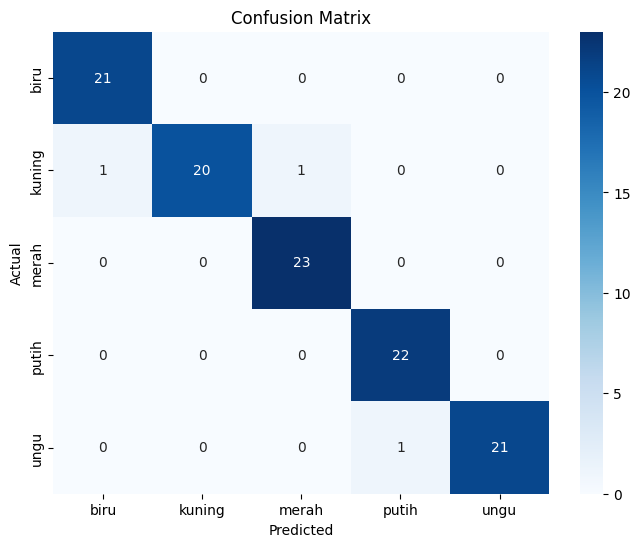

In [ ]:
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_aug, annot=True, fmt="d", cmap="Blues", xticklabels=colors, yticklabels=colors)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

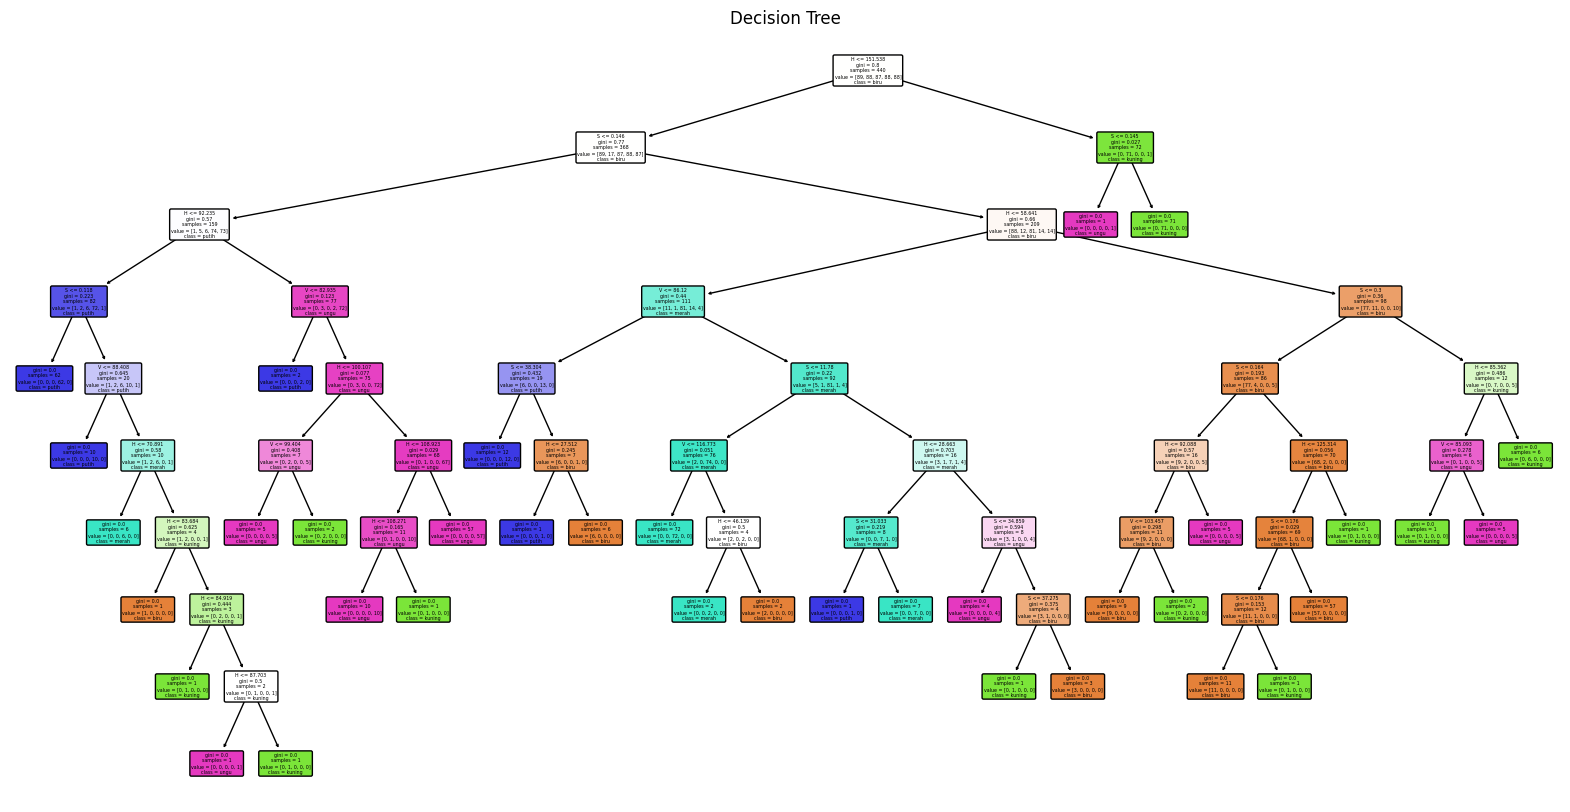

In [ ]:
# Plot Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(model_aug, feature_names=['H', 'S', 'V'], class_names=colors, filled=True, rounded=True)
plt.title('Decision Tree')
plt.show()